<a href="https://colab.research.google.com/github/fardinpratama/Learn-in-dicoding/blob/master/dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
X = iris.data
y = iris.target_names

In [0]:
df = pd.DataFrame(X, columns=iris.feature_names)

In [0]:
x_train = iris.data
y_train = iris.target

In [33]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
hasil = model_DT.predict([[6.2, 3.4, 5.4,2.3]])

In [36]:
y[hasil]

array(['virginica'], dtype='<U10')

In [0]:
# visualisasi
from sklearn.tree import export_graphviz
export_graphviz(model_DT,
                out_file = "grafik_iris_tree.dot",
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded =True,
                filled=True)

In [0]:
# linear regression
import numpy as np
import matplotlib.pyplot as plt
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
#data harga rummah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

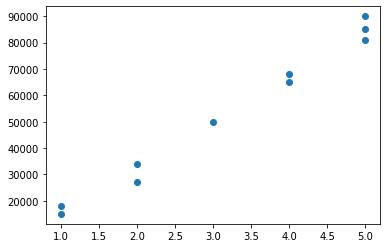

In [3]:
plt.scatter(bedrooms,house_price)

In [6]:
#training
from sklearn.linear_model import LinearRegression
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict = linreg.predict(bedrooms)

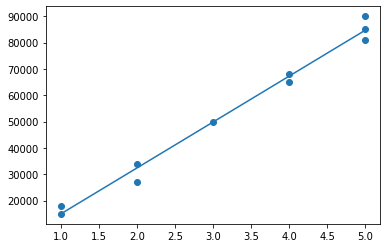

In [8]:
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, predict)

In [0]:
#logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [19]:
data = df.drop(columns=['User ID'])
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [0]:
Feature = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[Feature]
y = data["Purchased"] 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 

In [23]:
from sklearn.linear_model import LogisticRegression as lr
model_logR = lr()
model_logR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
model_logR.score(X_test, y_test)

0.65

In [0]:
predict = model_logR.predict(X_test)

In [41]:
#K-Means
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [0]:
df = df.rename(columns={
    'Gender' : "gender",
    "Age":"age",
    "Annual Income (k$)" : "annual_income",
    "Spending Score (1-100)" : "spending_score"
})

In [0]:
df['gender'].replace(["Female","Male"],[0,1], inplace=True)

In [33]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [0]:
drop = ['CustomerID', 'gender']
X = df.drop(drop, axis=1)

In [0]:
from sklearn.cluster import KMeans

cluster = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  cluster.append(km.inertia_)

In [39]:
cluster

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75479.76429338777,
 58300.44332159069,
 51098.58740856844,
 44309.83640371744,
 40631.6369510806,
 37378.420346320345]

Text(0, 0.5, 'Inertia')

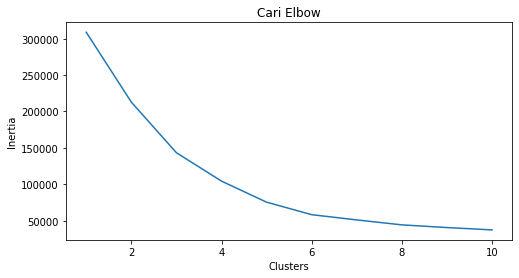

In [43]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=cluster, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [0]:
#terlihat perubahan yang tidak signifikan berada mulai dari 5 jadi ambil K =5
km5 = KMeans(n_clusters=5).fit(X)

In [0]:
X['label'] = km5.labels_

In [49]:
X

,age,annual_income,spending_score,label
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,0
196,45,126,28,2
197,32,126,74,0
198,32,137,18,2


Text(0.5, 1.0, 'KMean dengan 5 cluster')

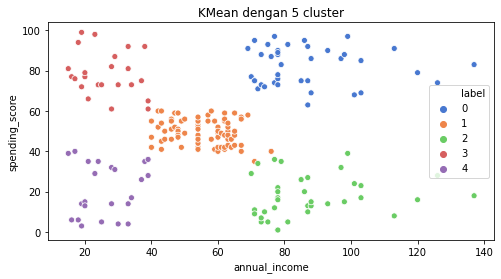

In [56]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['label'], palette=sns.color_palette("muted",5))
plt.title("KMean dengan 5 cluster")

In [0]:
#reduction with technique PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [0]:
iris = datasets.load_iris()
atribut = iris.data
label = iris.target
X_train, X_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2)

In [0]:
from sklearn.tree import DecisionTreeClassifier as DCD
model_DT = DCD()
model1 = model_DT.fit(X_train, y_train)
model2 = model_DT.fit(X_test, y_test)

In [63]:
model1.score(X_test, y_test)

1.0

In [68]:
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92748403, 0.0492503 , 0.01791427, 0.0053514 ])

In [0]:
#mengambil  principal component terbaik yaitu 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [76]:
model2 = model_DT.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.9

Terlihat bahwa model kita masih baik meskipun hanya menggunakan 2 atribut saja.